In [15]:
exp1_results  = "../../outputs/exp2_full_results.csv"
exp_name = "exp2"

In [16]:
import numpy as np
import os
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os 

In [17]:
all_models_df = pd.read_csv(exp1_results, index_col=False, usecols=lambda column: column != 'Unnamed: 0')

In [18]:
all_models_df.head()

,MAE,RMSE,SMAPE,r2,MASE,Training_time,Training_time_log,Inference_time,Inference_time_log,Model_memory,Model
0,3.286322,8.604321,19.750337,0.918424,0.847761,17.803598,2.934048,6.757077,2.048606,456.870440,HoeffdingTreeRegressor_ws_32
1,3.253851,8.582090,19.619776,0.918845,0.839385,18.600983,2.975580,6.073897,1.956412,536.443273,HoeffdingTreeRegressor_ws_32
2,3.473062,8.846662,20.571204,0.913764,0.895934,14.265496,2.725595,5.227467,1.828970,339.960547,HoeffdingTreeRegressor_ws_32
3,3.530282,8.911189,20.508241,0.912501,0.910695,17.626902,2.924607,6.304663,1.988513,373.381795,HoeffdingTreeRegressor_ws_32
4,3.359753,8.683785,19.980693,0.916910,0.866704,15.251554,2.788189,5.609841,1.888560,429.459672,HoeffdingTreeRegressor_ws_32


In [19]:
df_a = all_models_df[all_models_df.Model=="XGBRegressor_ws_9"].reset_index(drop=True)
df_a

,MAE,RMSE,SMAPE,r2,MASE,Training_time,Training_time_log,Inference_time,Inference_time_log,Model_memory,Model


In [20]:
df_a.columns

Index(['MAE', 'RMSE', 'SMAPE', 'r2', 'MASE', 'Training_time',
       'Training_time_log', 'Inference_time', 'Inference_time_log',
       'Model_memory', 'Model'],
      dtype='object')

# Pre-process to isolate window size from model name, and save. 

In [21]:
all_models_df

,MAE,RMSE,SMAPE,r2,MASE,Training_time,Training_time_log,Inference_time,Inference_time_log,Model_memory,Model
0,3.286322,8.604321,19.750337,0.918424,0.847761,17.803598,2.934048,6.757077,2.048606,456.870440,HoeffdingTreeRegressor_ws_32
1,3.253851,8.582090,19.619776,0.918845,0.839385,18.600983,2.975580,6.073897,1.956412,536.443273,HoeffdingTreeRegressor_ws_32
2,3.473062,8.846662,20.571204,0.913764,0.895934,14.265496,2.725595,5.227467,1.828970,339.960547,HoeffdingTreeRegressor_ws_32
3,3.530282,8.911189,20.508241,0.912501,0.910695,17.626902,2.924607,6.304663,1.988513,373.381795,HoeffdingTreeRegressor_ws_32
4,3.359753,8.683785,19.980693,0.916910,0.866704,15.251554,2.788189,5.609841,1.888560,429.459672,HoeffdingTreeRegressor_ws_32
...,...,...,...,...,...,...,...,...,...,...,...
975,4.904821,11.099057,24.528932,0.863996,1.266792,45.986953,3.849870,12.900311,2.631911,0.161770,SRPRegressor_ws_12
976,4.926476,11.094333,24.390741,0.864112,1.272385,90.711144,4.518644,30.716121,3.456825,0.177773,SRPRegressor_ws_12
977,4.968919,11.139051,24.796023,0.863014,1.283347,62.335208,4.148441,18.474203,2.969091,0.159031,SRPRegressor_ws_12
978,4.900282,11.131230,24.648084,0.863206,1.265620,45.778557,3.845425,12.746889,2.620813,0.169474,SRPRegressor_ws_12


In [22]:
def extract_window_size(model_name):
    """
    Extracts the window size from the model name.

    Parameters:
    - model_name (str): The name of the model.

    Returns:
    - int: The window size extracted from the model name.
    """
    try:
        window_size = int(model_name.split('_ws_')[1])
        model_name = model_name.split('_ws_')[0]
        return model_name, window_size
    except IndexError:
        return None, None

def add_window_size_column(df):
    """
    Adds a new column 'window_size' to the DataFrame based on the model names.

    Parameters:
    - df (pandas DataFrame): The DataFrame containing the 'Model' column with model names.

    Returns:
    - pandas DataFrame: The DataFrame with the added 'window_size' column.
    """
    df['Model'], df['window_size'] = zip(*df['Model'].apply(extract_window_size))
    return df


# Apply the function to add the 'window_size' column
all_models_df = add_window_size_column(all_models_df)
all_models_df

,MAE,RMSE,SMAPE,r2,MASE,Training_time,Training_time_log,Inference_time,Inference_time_log,Model_memory,Model,window_size
0,3.286322,8.604321,19.750337,0.918424,0.847761,17.803598,2.934048,6.757077,2.048606,456.870440,HoeffdingTreeRegressor,32
1,3.253851,8.582090,19.619776,0.918845,0.839385,18.600983,2.975580,6.073897,1.956412,536.443273,HoeffdingTreeRegressor,32
2,3.473062,8.846662,20.571204,0.913764,0.895934,14.265496,2.725595,5.227467,1.828970,339.960547,HoeffdingTreeRegressor,32
3,3.530282,8.911189,20.508241,0.912501,0.910695,17.626902,2.924607,6.304663,1.988513,373.381795,HoeffdingTreeRegressor,32
4,3.359753,8.683785,19.980693,0.916910,0.866704,15.251554,2.788189,5.609841,1.888560,429.459672,HoeffdingTreeRegressor,32
...,...,...,...,...,...,...,...,...,...,...,...,...
975,4.904821,11.099057,24.528932,0.863996,1.266792,45.986953,3.849870,12.900311,2.631911,0.161770,SRPRegressor,12
976,4.926476,11.094333,24.390741,0.864112,1.272385,90.711144,4.518644,30.716121,3.456825,0.177773,SRPRegressor,12
977,4.968919,11.139051,24.796023,0.863014,1.283347,62.335208,4.148441,18.474203,2.969091,0.159031,SRPRegressor,12
978,4.900282,11.131230,24.648084,0.863206,1.265620,45.778557,3.845425,12.746889,2.620813,0.169474,SRPRegressor,12


In [23]:
len(all_models_df.Model.unique())

7

In [24]:
all_models_df

,MAE,RMSE,SMAPE,r2,MASE,Training_time,Training_time_log,Inference_time,Inference_time_log,Model_memory,Model,window_size
0,3.286322,8.604321,19.750337,0.918424,0.847761,17.803598,2.934048,6.757077,2.048606,456.870440,HoeffdingTreeRegressor,32
1,3.253851,8.582090,19.619776,0.918845,0.839385,18.600983,2.975580,6.073897,1.956412,536.443273,HoeffdingTreeRegressor,32
2,3.473062,8.846662,20.571204,0.913764,0.895934,14.265496,2.725595,5.227467,1.828970,339.960547,HoeffdingTreeRegressor,32
3,3.530282,8.911189,20.508241,0.912501,0.910695,17.626902,2.924607,6.304663,1.988513,373.381795,HoeffdingTreeRegressor,32
4,3.359753,8.683785,19.980693,0.916910,0.866704,15.251554,2.788189,5.609841,1.888560,429.459672,HoeffdingTreeRegressor,32
...,...,...,...,...,...,...,...,...,...,...,...,...
975,4.904821,11.099057,24.528932,0.863996,1.266792,45.986953,3.849870,12.900311,2.631911,0.161770,SRPRegressor,12
976,4.926476,11.094333,24.390741,0.864112,1.272385,90.711144,4.518644,30.716121,3.456825,0.177773,SRPRegressor,12
977,4.968919,11.139051,24.796023,0.863014,1.283347,62.335208,4.148441,18.474203,2.969091,0.159031,SRPRegressor,12
978,4.900282,11.131230,24.648084,0.863206,1.265620,45.778557,3.845425,12.746889,2.620813,0.169474,SRPRegressor,12


In [25]:
all_models_df.Model.unique()

array(['HoeffdingTreeRegressor', 'PassiveAggressive', 'MLP_partialfit',
       'SRPRegressor', 'AdaptiveRandomForest', 'SGDRegressor',
       'HoeffdingAdaptiveTreeRegressor'], dtype=object)

In [26]:
if exp_name=="exp1":
    model_mapping = {
        'SVR': 'SVR',
        'RandomForestRegressor': 'RandomForest',
        'KNeighborsRegressor': 'KNN',
        'MLPRegressor': 'MLP',
        'LSTM': 'LSTM',
        'GRU': 'GRU',
        'AdaBoostRegressor': 'AdaBoost',
        'SGDRegressor': 'SGD',
        'BI-LSTM': 'BI-LSTM',
        'XGBRegressor': 'XGBoost',
        'LSTM_ATTN': 'LSTM with Attention',
        'PassiveAggressiveRegressor': 'PA',
        'LinearRegression': 'LR',
        'DecisionTreeRegressor': 'DecisionTree'
    }
else:
    model_mapping = {
            'MLP_partialfit': 'MLP',
            'AdaptiveRandomForest':'ARF',
            'SRPRegressor':'SRP',
            'HoeffdingTreeRegressor':'HTR',
            'HoeffdingAdaptiveTreeRegressor':'HATR', 
             'PassiveAggressive':'PA'
        }
all_models_df['Model'] = all_models_df['Model'].replace(model_mapping)
all_models_df

,MAE,RMSE,SMAPE,r2,MASE,Training_time,Training_time_log,Inference_time,Inference_time_log,Model_memory,Model,window_size
0,3.286322,8.604321,19.750337,0.918424,0.847761,17.803598,2.934048,6.757077,2.048606,456.870440,HTR,32
1,3.253851,8.582090,19.619776,0.918845,0.839385,18.600983,2.975580,6.073897,1.956412,536.443273,HTR,32
2,3.473062,8.846662,20.571204,0.913764,0.895934,14.265496,2.725595,5.227467,1.828970,339.960547,HTR,32
3,3.530282,8.911189,20.508241,0.912501,0.910695,17.626902,2.924607,6.304663,1.988513,373.381795,HTR,32
4,3.359753,8.683785,19.980693,0.916910,0.866704,15.251554,2.788189,5.609841,1.888560,429.459672,HTR,32
...,...,...,...,...,...,...,...,...,...,...,...,...
975,4.904821,11.099057,24.528932,0.863996,1.266792,45.986953,3.849870,12.900311,2.631911,0.161770,SRP,12
976,4.926476,11.094333,24.390741,0.864112,1.272385,90.711144,4.518644,30.716121,3.456825,0.177773,SRP,12
977,4.968919,11.139051,24.796023,0.863014,1.283347,62.335208,4.148441,18.474203,2.969091,0.159031,SRP,12
978,4.900282,11.131230,24.648084,0.863206,1.265620,45.778557,3.845425,12.746889,2.620813,0.169474,SRP,12


# Boxplot fetched by means

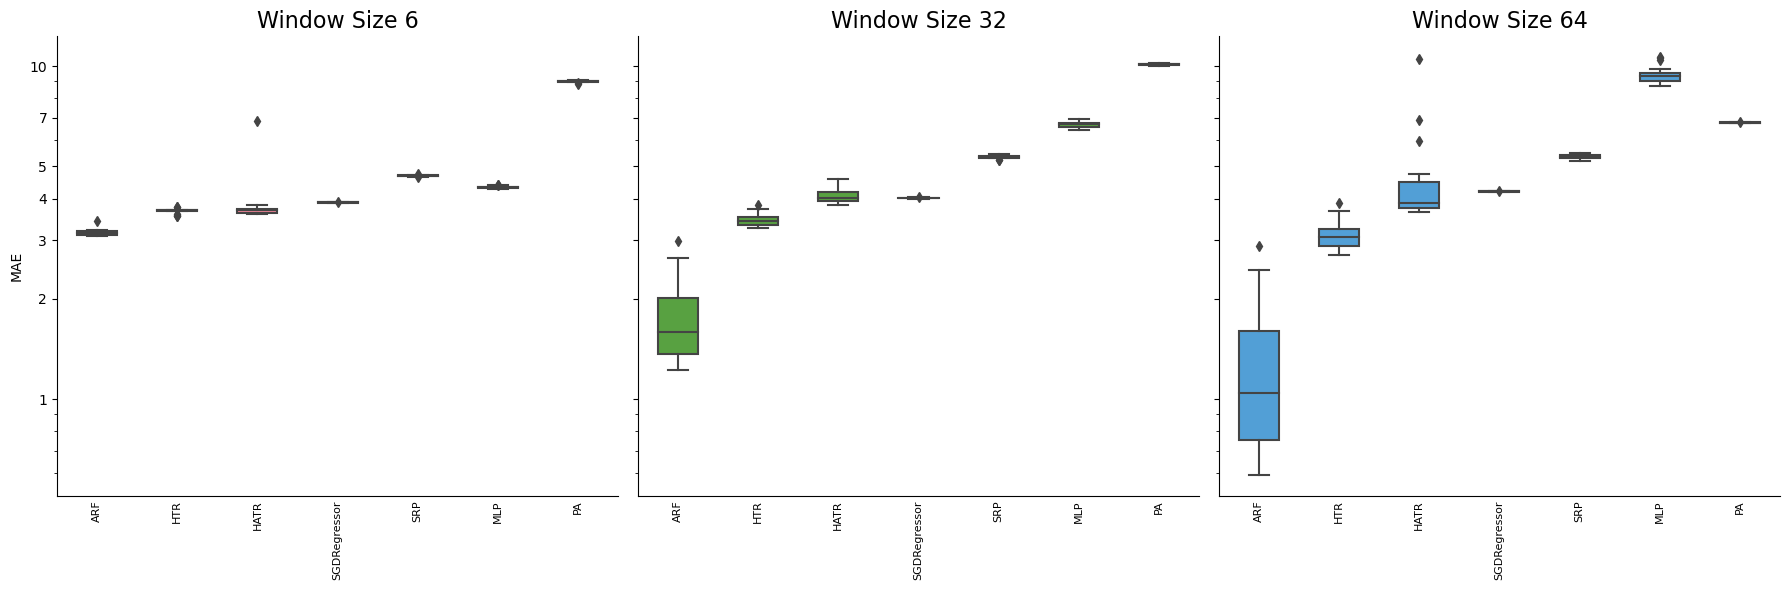

In [27]:

def order_by_median(df,reverse = False):
    grouped_df = df.groupby('Model')
    algo_medians = {}
    for cur_group in grouped_df.groups.keys():
        df_cur_grp = grouped_df.get_group(cur_group)
        algo_medians[cur_group] = df_cur_grp['MAE'].median()
    sorted_algo_medians = dict(sorted(algo_medians.items(), key=lambda kv: kv[1], reverse=reverse))
    return list(sorted_algo_medians.keys())

def draw_save_boxplot(df, hue_order_learner, save_filename, prequential=False):
    custom_palette = sns.color_palette("husl", n_colors=len(hue_order_learner))

    g = sns.FacetGrid(df, col='window_size', col_wrap=3, height=6, aspect=1, 
                      margin_titles=True, sharex=False)
    ordered_algo_list = order_by_median(df, reverse=False)
    g.map_dataframe(sns.boxplot, x='Model', y=metric_type, hue='window_size', 
                    data=df, order=ordered_algo_list, dodge=False, width=0.5, 
                    hue_order=hue_order_learner, palette=custom_palette)
    g.set_xticklabels(rotation=90)

    g.set_titles(col_template="Window Size {col_name}", fontsize=100)  
    g.set(yscale='log')  # Set y-axis scale to logarithmic

    if exp_name=="exp1":
        y_ticks = [1, 2, 3, 4, 5, 7, 10, 14,  20, 30, 50]
    else:
        y_ticks = [1, 2, 3, 4, 5, 7, 10]
    g.set(yticks=y_ticks)
    g.set_yticklabels(y_ticks, fontsize=10)

    g.set_ylabels(metric_type, fontsize=10)
    g.set_xlabels('')

    for ax in g.axes.flat:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=8, ha='center')
        ax.tick_params(axis='x', which='both', length=0)
        for tick in ax.get_xticklabels():
            algorithm_name = tick.get_text()
            ax.annotate(algorithm_name, xy=(tick.get_position()[0], 0), xytext=(0, -20),
                        textcoords='offset points', ha='center', va='top', rotation=90, fontsize=10)

    for ax in g.axes.flat:
        title = ax.get_title()
        ax.set_title(title, fontsize=16)  # Set title font size to 24

    plt.tight_layout()
    plt.savefig(f'./images/box_plot_{save_filename}.pdf', dpi=300)
    plt.show()


metric_type = 'MAE'

filter_values = [6, 32, 64]

filtered_df = all_models_df[all_models_df['window_size'].isin(filter_values)]

hue_order_learner = sorted(filtered_df['window_size'].unique())


os.makedirs("./images", exist_ok=True)

draw_save_boxplot(filtered_df, hue_order_learner, exp_name)